#geopandas 

#https://lvis.gsfc.nasa.gov/workshop/LVIS_QGIS_Tutorial_Gabon.pdf

##### LVIS L2 Elevation and Height Products

In [157]:
##### LVIS L2 Elevation and Height Products

In [230]:
import matplotlib.pyplot 
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *

Bring all the data data in 

In [231]:
LVIS = pd.read_csv (r'D:\Gabon_Lidar\DATA\pandas_csv\LVIS2_Gabon2016_0308_R1808_studyareaa.csv')
LVIS

,OBJECTID,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,...,RH98,RH99,RH100,AZIMUTH,INCIDENTANGLE,RANGE,COMPLEXITY,CHANNEL_L1B,CHANNEL_ZG,CHANNEL_RH
0,1,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,...,8.54,9.06,9.96,188.40,2.235,7705.33,-999,1,1,1
1,2,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,...,3.37,3.74,4.34,187.58,2.465,7705.35,-999,1,1,1
2,3,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,...,5.69,6.14,6.74,187.34,2.542,7705.95,-999,1,1,1
3,4,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,...,2.99,3.36,3.96,186.70,2.772,7707.17,-999,1,1,1
4,5,1657455174,11689494,48006.897,9.422884,0.616572,17.47,-999,-999,-999,...,2.77,3.14,3.66,186.50,2.849,7707.77,-999,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,824,1657455148,9911421,46228.812,9.330292,0.546591,25.30,-999,-999,-999,...,3.26,3.86,5.43,175.01,2.612,7703.56,-999,2,2,1
824,825,1657455148,9911422,46228.813,9.330293,0.546496,24.39,-999,-999,-999,...,5.39,7.19,9.28,175.16,2.690,7704.76,-999,1,1,1
825,826,1657455148,9911424,46228.815,9.330295,0.546308,26.94,-999,-999,-999,...,4.57,5.76,8.23,175.42,2.844,7706.57,-999,1,1,1
826,827,1657455148,9911425,46228.816,9.330296,0.546213,24.59,-999,-999,-999,...,6.06,6.66,7.93,175.54,2.921,7706.58,-999,1,1,1


In [232]:
# Geopandas 

In [233]:
subplots = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Plot-0_25ha.shp')

In [234]:
subplots.head(3)

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA01,1.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((535822.917 61366.633, 535823.867 613..."
1,NASA01,1.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,14.75,11.76,18.51,58,232,0.66,2.63,0.50,23.30,"POLYGON ((535821.018 61316.669, 535821.968 613..."
2,NASA01,2.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,49.84,39.29,62.83,96,384,2.07,8.26,0.46,26.20,"POLYGON ((535872.881 61364.734, 535873.831 613..."


In [235]:
#Changing CRS 
subplots_4326= subplots.to_crs(epsg=4326)

C:\Users\17183\anaconda3\envs\Geopandas_h5pytest\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


<AxesSubplot:>

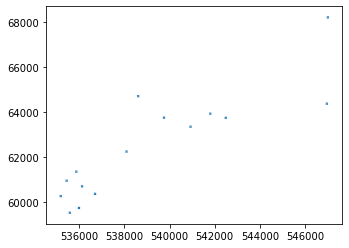

In [236]:
subplots.plot()

In [237]:
LVISpoints = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\LVIS2_Gabon2016_0308_R1808_studyarea.shp')

In [380]:
LVISpoints_4326 = LVISpoints.to_crs(epsg=4326)


In [381]:
LVISpoints = LVISpoints_4326

In [382]:
LVISpoints

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,AZIMUTH,INCIDENTAN,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X,POINT_Y,geometry
0,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,9.422889,...,188.40,2.235,7705.33,-999,1,1,1,9.422888,0.617327,"POLYGON ((29.42289 0.61733, 29.41084 0.12665, ..."
1,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,9.422886,...,187.58,2.465,7705.35,-999,1,1,1,9.422886,0.617044,"POLYGON ((29.42289 0.61704, 29.41084 0.12637, ..."
2,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,9.422886,...,187.34,2.542,7705.95,-999,1,1,1,9.422886,0.616949,"POLYGON ((29.42289 0.61695, 29.41084 0.12627, ..."
3,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,9.422884,...,186.70,2.772,7707.17,-999,1,1,1,9.422884,0.616666,"POLYGON ((29.42288 0.61667, 29.41084 0.12599, ..."
4,1657455174,11689494,48006.897,9.422884,0.616572,17.47,-999,-999,-999,9.422884,...,186.50,2.849,7707.77,-999,1,1,1,9.422884,0.616572,"POLYGON ((29.42288 0.61657, 29.41084 0.12590, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,1657455148,9911421,46228.812,9.330292,0.546591,25.30,-999,-999,-999,9.330292,...,175.01,2.612,7703.56,-999,2,2,1,9.330292,0.546591,"POLYGON ((29.33029 0.54659, 29.31825 0.05591, ..."
824,1657455148,9911422,46228.813,9.330293,0.546496,24.39,-999,-999,-999,9.330293,...,175.16,2.690,7704.76,-999,1,1,1,9.330293,0.546496,"POLYGON ((29.33029 0.54650, 29.31825 0.05582, ..."
825,1657455148,9911424,46228.815,9.330295,0.546308,26.94,-999,-999,-999,9.330295,...,175.42,2.844,7706.57,-999,1,1,1,9.330295,0.546308,"POLYGON ((29.33030 0.54631, 29.31825 0.05563, ..."
826,1657455148,9911425,46228.816,9.330296,0.546213,24.59,-999,-999,-999,9.330296,...,175.54,2.921,7706.58,-999,1,1,1,9.330296,0.546213,"POLYGON ((29.33030 0.54621, 29.31825 0.05554, ..."


In [383]:
#826 LVIS

In [384]:
LVISpoints.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

C:\Users\17183\anaconda3\envs\Geopandas_h5pytest\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


<AxesSubplot:>

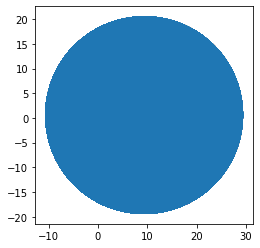

In [385]:
LVISpoints.plot()

Mondah_Field_Data_Trees

Data dictionary
https://lvis.gsfc.nasa.gov/data_sets/2016_gabon/LVIS_GabonAfriSAR_data_release.pdf

In [386]:
Trees = gpd.read_file(r'D:\Gabon_Lidar\DATA\shp\Mondah_Field_Data_Trees_in_study_site_lat_lon_a.shp')

In [387]:
Trees_4326= Trees.to_crs(epsg=4326)

In [388]:
Trees = Trees_4326

<AxesSubplot:>

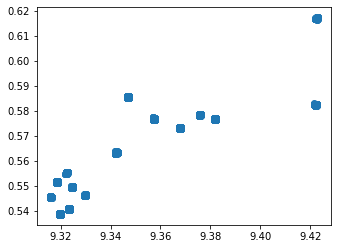

In [389]:
Trees.plot()

In [390]:
#finding point in a polygon 


In [391]:
LVIS_in_subplots = gpd.overlay(LVISpoints,subplots_4326, how = 'intersection')

In [398]:
LVIS_in_subplots.groupby(['SHOTNUMBER'])

In [399]:
LVIS_in_subplots

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,9.422889,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((9.32194 0.55519, 9.32195 0.55542, 9...."
1,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,9.422886,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((9.32194 0.55519, 9.32195 0.55542, 9...."
2,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,9.422886,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((9.32194 0.55519, 9.32195 0.55542, 9...."
3,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,9.422884,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((9.32194 0.55519, 9.32195 0.55542, 9...."
4,1657455174,11689494,48006.897,9.422884,0.616572,17.47,-999,-999,-999,9.422884,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((9.32194 0.55519, 9.32195 0.55542, 9...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49675,1657455148,9911421,46228.812,9.330292,0.546591,25.30,-999,-999,-999,9.330292,...,16.69,9.73,26.55,8,32,0.51,2.04,0.54,26.20,"POLYGON ((9.31618 0.54493, 9.31619 0.54516, 9...."
49676,1657455148,9911422,46228.813,9.330293,0.546496,24.39,-999,-999,-999,9.330293,...,16.69,9.73,26.55,8,32,0.51,2.04,0.54,26.20,"POLYGON ((9.31618 0.54493, 9.31619 0.54516, 9...."
49677,1657455148,9911424,46228.815,9.330295,0.546308,26.94,-999,-999,-999,9.330295,...,16.69,9.73,26.55,8,32,0.51,2.04,0.54,26.20,"POLYGON ((9.31618 0.54493, 9.31619 0.54516, 9...."
49678,1657455148,9911425,46228.816,9.330296,0.546213,24.59,-999,-999,-999,9.330296,...,16.69,9.73,26.55,8,32,0.51,2.04,0.54,26.20,"POLYGON ((9.31618 0.54493, 9.31619 0.54516, 9...."


C:\Users\17183\anaconda3\envs\Geopandas_h5pytest\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


<AxesSubplot:>

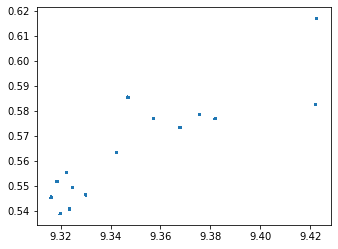

In [400]:
LVIS_in_subplots.plot()

In [401]:
subplots_4326

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA01,1.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((9.32194 0.55519, 9.32195 0.55542, 9...."
1,NASA01,1.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,14.75,11.76,18.51,58,232,0.66,2.63,0.50,23.30,"POLYGON ((9.32193 0.55474, 9.32194 0.55497, 9...."
2,NASA01,2.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,49.84,39.29,62.83,96,384,2.07,8.26,0.46,26.20,"POLYGON ((9.32239 0.55518, 9.32240 0.55540, 9...."
3,NASA01,2.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,31.38,23.51,41.00,40,160,1.14,4.55,0.49,26.57,"POLYGON ((9.32239 0.55495, 9.32239 0.55518, 9...."
4,NASA02,1.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,135.58,98.84,186.53,122,488,3.43,13.73,0.53,59.23,"POLYGON ((9.31812 0.55157, 9.31813 0.55179, 9...."
5,NASA02,1.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,164.60,133.47,201.55,142,568,4.84,19.36,0.56,42.10,"POLYGON ((9.31811 0.55134, 9.31812 0.55157, 9...."
6,NASA02,2.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,143.22,125.73,161.85,186,744,5.05,20.21,0.56,28.44,"POLYGON ((9.31857 0.55155, 9.31858 0.55178, 9...."
7,NASA02,2.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,628.04,480.42,807.15,146,584,11.90,47.61,0.70,42.50,"POLYGON ((9.31856 0.55133, 9.31857 0.55155, 9...."
8,NASA03,1.1,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,14.74,11.23,19.21,35,140,0.75,3.01,0.40,26.07,"POLYGON ((9.32424 0.54932, 9.32425 0.54954, 9...."
9,NASA03,1.2,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,27.77,20.37,38.30,61,244,0.97,3.89,0.51,35.67,"POLYGON ((9.32423 0.54909, 9.32424 0.54932, 9...."


In [402]:
#Filter for one subplot 

In [403]:
subplots

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA01,1.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,8.44,7.02,10.25,59,236,0.47,1.90,0.48,17.93,"POLYGON ((535822.917 61366.633, 535823.867 613..."
1,NASA01,1.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,14.75,11.76,18.51,58,232,0.66,2.63,0.50,23.30,"POLYGON ((535821.018 61316.669, 535821.968 613..."
2,NASA01,2.1,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,49.84,39.29,62.83,96,384,2.07,8.26,0.46,26.20,"POLYGON ((535872.881 61364.734, 535873.831 613..."
3,NASA01,2.2,2016-02-01,TropRF,3108.12,25.62,Evergreen Broadleaf trees,0.555159,9.322411,C,...,31.38,23.51,41.00,40,160,1.14,4.55,0.49,26.57,"POLYGON ((535871.932 61339.752, 535872.881 613..."
4,NASA02,1.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,135.58,98.84,186.53,122,488,3.43,13.73,0.53,59.23,"POLYGON ((535397.386 60965.832, 535398.337 609..."
5,NASA02,1.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,164.60,133.47,201.55,142,568,4.84,19.36,0.56,42.10,"POLYGON ((535396.436 60940.851, 535397.386 609..."
6,NASA02,2.1,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,143.22,125.73,161.85,186,744,5.05,20.21,0.56,28.44,"POLYGON ((535447.350 60963.931, 535448.301 609..."
7,NASA02,2.2,2016-02-01,TropRF,3104.57,25.63,Evergreen Broadleaf trees,0.551534,9.318586,C,...,628.04,480.42,807.15,146,584,11.90,47.61,0.70,42.50,"POLYGON ((535446.399 60938.949, 535447.350 609..."
8,NASA03,1.1,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,14.74,11.23,19.21,35,140,0.75,3.01,0.40,26.07,"POLYGON ((536078.570 60717.052, 536079.520 607..."
9,NASA03,1.2,2016-02-01,TropRF,3097.73,25.64,Evergreen Broadleaf trees,0.549282,9.324708,C,...,27.77,20.37,38.30,61,244,0.97,3.89,0.51,35.67,"POLYGON ((536077.620 60692.070, 536078.570 607..."


In [404]:
#Filter for plot

In [405]:
subplots13 = subplots_4326[(subplots_4326['plot'] == 'NASA13')]

In [406]:
subplots13

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
28,NASA13,1.1,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,237.47,206.62,272.37,146,584,6.65,26.59,0.59,32.22,"POLYGON ((9.35684 0.57683, 9.35685 0.57705, 9...."
29,NASA13,1.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,284.33,243.19,334.24,206,824,7.28,29.13,0.65,32.37,"POLYGON ((9.35683 0.57660, 9.35684 0.57683, 9...."
30,NASA13,2.1,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,238.84,181.73,321.15,294,1176,6.66,26.65,0.59,38.39,"POLYGON ((9.35729 0.57681, 9.35729 0.57704, 9...."
31,NASA13,2.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [407]:
subplots13

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
28,NASA13,1.1,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,237.47,206.62,272.37,146,584,6.65,26.59,0.59,32.22,"POLYGON ((9.35684 0.57683, 9.35685 0.57705, 9...."
29,NASA13,1.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,284.33,243.19,334.24,206,824,7.28,29.13,0.65,32.37,"POLYGON ((9.35683 0.57660, 9.35684 0.57683, 9...."
30,NASA13,2.1,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,238.84,181.73,321.15,294,1176,6.66,26.65,0.59,38.39,"POLYGON ((9.35729 0.57681, 9.35729 0.57704, 9...."
31,NASA13,2.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [408]:
# Filter for subplot 

In [419]:
subplots13_22 = subplots13[(subplots13.subplot == 2.2)]

In [420]:
subplots13_22.head()

,plot,subplot,date,vegetation,map,mat,pft_name,latitude,longitude,p_origin,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
31,NASA13,2.2,2016-02-01,TropRF,3117.25,25.64,Evergreen Broadleaf trees,0.576793,9.357303,C,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [421]:
#Finding LVIS in subplot 2.2

This Select the LVIS shots that fall within NASA13 2.2

In [422]:
LVIS_in_subplots13_22 = gpd.overlay(LVISpoints,subplots13_22, how = 'intersection')

In [425]:
LVIS_in_subplots13_22.columns

Index(['LFID', 'SHOTNUMBER', 'TIME', 'GLON', 'GLAT', 'ZG', 'HLON', 'HLAT',
       'ZH', 'TLON', 'TLAT', 'ZT', 'RH10', 'RH15', 'RH20', 'RH25', 'RH30',
       'RH35', 'RH40', 'RH45', 'RH50', 'RH55', 'RH60', 'RH65', 'RH70', 'RH75',
       'RH80', 'RH85', 'RH90', 'RH95', 'RH96', 'RH97', 'RH98', 'RH99', 'RH100',
       'AZIMUTH', 'INCIDENTAN', 'RANGE', 'COMPLEXITY', 'CHANNEL_L1',
       'CHANNEL_ZG', 'CHANNEL_RH', 'POINT_X', 'POINT_Y', 'plot', 'subplot',
       'date', 'vegetation', 'map', 'mat', 'pft_name', 'latitude', 'longitude',
       'p_origin', 'p_orientat', 'p_shape', 'p_majoraxi', 'p_minoraxi',
       'p_epsg', 'p_area', 'p_mindiam', 'sp_ix', 'sp_iy', 'dft', 'agb',
       'agb_valid', 'agb_lower', 'agb_upper', 'agbd_ha', 'agbd_ha_lo',
       'agbd_ha_up', 'sn', 'snd_ha', 'sba', 'sba_ha', 'swsg_ba', 'h_t_max',
       'geometry'],
      dtype='object')

In [ ]:
#subplots13 = subplots_4326[(subplots_4326['plot'] == 'NASA13')]

In [429]:
LVIS_in_subplots13_22 = gpd.overlay(LVISpoints,subplots13_22, how = 'identity')

C:\Users\17183\anaconda3\envs\Geopandas_h5pytest\lib\site-packages\pandas\core\dtypes\cast.py:1581: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  result[:] = values
C:\Users\17183\anaconda3\envs\Geopandas_h5pytest\lib\site-packages\geopandas\_vectorized.py:142: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [427]:
LVIS_in_subplots13_22 = LVIS_in_subplots13_22([LVIS_in_subplots13_22['subplot'] == '2.2'])

C:\Users\17183\anaconda3\envs\Geopandas_h5pytest\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


TypeError: 'GeoDataFrame' object is not callable

In [415]:
LVIS_in_subplots13_22

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,9.422889,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
1,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,9.422886,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
2,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,9.422886,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
3,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,9.422884,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
4,1657455174,11689494,48006.897,9.422884,0.616572,17.47,-999,-999,-999,9.422884,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,1657455148,9911421,46228.812,9.330292,0.546591,25.30,-999,-999,-999,9.330292,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
824,1657455148,9911422,46228.813,9.330293,0.546496,24.39,-999,-999,-999,9.330293,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
825,1657455148,9911424,46228.815,9.330295,0.546308,26.94,-999,-999,-999,9.330295,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
826,1657455148,9911425,46228.816,9.330296,0.546213,24.59,-999,-999,-999,9.330296,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [321]:
#Finding Trees 

Finding the trees that fall with in NASA 13 subplot 2.2 

In [322]:
Trees_in_subplots13_22 = gpd.overlay(Trees_4326,subplots13_22, how = 'intersection')

In [323]:
Trees_in_subplots13_22

,plot_1,subplot_1,tree_date,family,species,wsg,tree,stem,epsg,x,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA13,6,2016-02-04,Euphorbiaceae,Anthostema aubryanum,0.330000,5153,1,32632,539756.1937,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57681)
1,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100927,1,32632,539756.4196,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35730 0.57662)
2,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100928,1,32632,539756.4196,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35730 0.57662)
3,NASA13,8,2016-02-04,Euphorbiaceae,Crotonogyne sp.,0.543103,100945,1,32632,539756.0424,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57653)
4,NASA13,8,2016-02-04,Myristicaceae,Staudtia kamerunensis,0.796529,5186,1,32632,539756.0424,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57653)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101285,1,32632,539784.0225,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35754 0.57652)
260,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101286,1,32632,539781.0623,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35752 0.57653)
261,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101287,1,32632,539782.6367,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57655)
262,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101288,1,32632,539782.6744,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57656)


Now with have the trees in that sub plot. 

In [324]:
#Selecting the tree and LVIS 

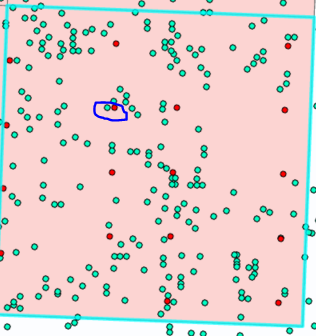

The red point is 9421011 and the green dot is 101044. We be using these to check there ABG before expanding it to the whole study are a

In [325]:
#LVISshotpoints = LVISpoints[(LVISpoints.LFID == 1657455174)]


In [326]:
#LVISshotpoints.head(3)

In [327]:
# Ploting 

Subsetting it into a smaller data set 

In [328]:

LVIS_in_subplots13_22.head()

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,9.422889,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
1,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,9.422886,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
2,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,9.422886,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
3,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,9.422884,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
4,1657455174,11689494,48006.897,9.422884,0.616572,17.47,-999,-999,-999,9.422884,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [329]:
#Select by Shot numer 
#LVISshot = LVIS[(LVIS.LFID == 1657455174)]


In [330]:
# This is creating the array 

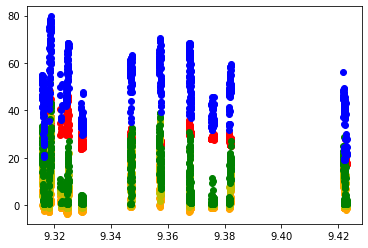

In [331]:
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZG,color='r') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH25,color='orange') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH50,color='y')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH75,color='g')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZT,color='b')
matplotlib.pyplot.show()

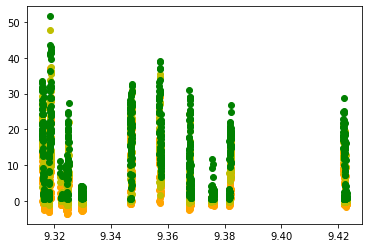

In [332]:
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZG,color='r') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH25,color='orange') 
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH50,color='y')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH75,color='g')
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZT,color='b')
matplotlib.pyplot.show()

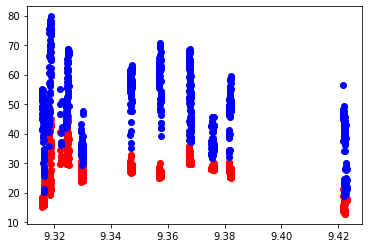

In [333]:
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZG,color='r') 
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH25,color='orange') 
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH50,color='y')
#matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.RH75,color='g')
matplotlib.pyplot.scatter(LVIS_in_subplots13_22.GLON,LVIS_in_subplots13_22.ZT,color='b')
matplotlib.pyplot.show()

In [334]:
I don't know after this point 

SyntaxError: invalid syntax (<ipython-input-334-b1b6413b441c>, line 1)

##### Finding AGB

Aboveground Biomass(AGB) is the amount of living matter above the ground. The foumulat bellow is from "Comparison of Small- and Large-Footprint Lidar Characterization of Tropical Forest Aboveground Structure and Biomass: A Case Study From Central Gabon (Silva, et al. 2018)" in it they use AGB (kg) = 0.0673 × (ρ × dbh2 × ht)0.976 they which is Chave formula (Chave , et al. 2015)

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

were dbh is in cm, ht is in m, and ρ is the wood density in g·cm−3.
The total AGB at plot level was then obtained by summing
individual stem biomass estimates and converting it to Mg·ha−1.


Starting of will be bring in the LVIS Shots and trees  in Subplot NASA 13 2.2 

In [335]:
LVIS_in_subplots13_22

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,9.422889,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
1,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,9.422886,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
2,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,9.422886,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
3,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,9.422884,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
4,1657455174,11689494,48006.897,9.422884,0.616572,17.47,-999,-999,-999,9.422884,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,1657455148,9911421,46228.812,9.330292,0.546591,25.30,-999,-999,-999,9.330292,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
824,1657455148,9911422,46228.813,9.330293,0.546496,24.39,-999,-999,-999,9.330293,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
825,1657455148,9911424,46228.815,9.330295,0.546308,26.94,-999,-999,-999,9.330295,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
826,1657455148,9911425,46228.816,9.330296,0.546213,24.59,-999,-999,-999,9.330296,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [336]:
#Finding Trees 

Finding the trees that fall with in NASA 13 subplot 2.2 

In [337]:
Trees_in_subplots13_22 = gpd.overlay(Trees_4326,subplots13_22, how = 'intersection')

In [338]:
Trees_in_subplots13_22

,plot_1,subplot_1,tree_date,family,species,wsg,tree,stem,epsg,x,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA13,6,2016-02-04,Euphorbiaceae,Anthostema aubryanum,0.330000,5153,1,32632,539756.1937,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57681)
1,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100927,1,32632,539756.4196,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35730 0.57662)
2,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100928,1,32632,539756.4196,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35730 0.57662)
3,NASA13,8,2016-02-04,Euphorbiaceae,Crotonogyne sp.,0.543103,100945,1,32632,539756.0424,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57653)
4,NASA13,8,2016-02-04,Myristicaceae,Staudtia kamerunensis,0.796529,5186,1,32632,539756.0424,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57653)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101285,1,32632,539784.0225,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35754 0.57652)
260,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101286,1,32632,539781.0623,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35752 0.57653)
261,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101287,1,32632,539782.6367,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57655)
262,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101288,1,32632,539782.6744,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57656)


Now with have the trees in that sub plot. 

In [339]:
#Selecting the tree and LVIS 


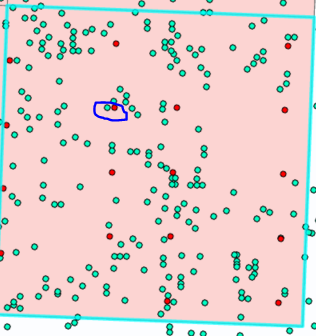


The red point is shot number 9421011 and the green dot is tree 101044. We be using these to check there ABG before expanding it to the whole study


In [340]:
LVIS9421011 = LVISpoints[(LVISpoints.SHOTNUMBER == 9421011)]

In [341]:
LVIS9421011

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,AZIMUTH,INCIDENTAN,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X,POINT_Y,geometry
455,1657455141,9421011,45738.398,9.357443,0.576661,26.59,-999,-999,-999,9.357446,...,195.21,1.827,7705.91,-999,1,1,1,9.357443,0.576661,"POLYGON ((19.35744 0.57666, 19.30929 -0.40351,..."


In [342]:
trees = Trees_in_subplots13_22[(Trees_in_subplots13_22.tree == 101044)]

In [343]:
trees

,plot_1,subplot_1,tree_date,family,species,wsg,tree,stem,epsg,x,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
122,NASA13,10,2016-02-04,Urticaceae,Musanga cecropioides,0.242833,101044,1,32632,539771.5976,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35743 0.57666)


Returning to out formula we need the find the ρ which is densentity. The can be found using the 

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

were dbh is in cm, ht is in m, and ρ is the wood density in g·cm−3. The total AGB at plot level was then obtained by summing individual stem biomass estimates and converting it to Mg·ha−1.

The wood density came from the following two papers 


[1] J. Chave, D. A. Coomes, S. Jansen, S. L. Lewis, N. G. Swenson,
and A. E. Zanne, “Towards a worldwide wood economics spectrum,”
Ecol. Lett., vol. 12, no. 4, pp. 351–366, 2009. [Online]. Available:
https://doi.org/10.1111/j.1461-0248.2009.01285.x
[42] A. E. Zanne et al., Data from: Towards a Worldwide Wood Economics Spectrum, Dryad Digital Repository, 2009. [Online]. Available:
https://doi.org/10.5061/dryad.234

This is bringing in the would density database for the ρ

In [344]:
The would Density in data set is wsg field and it comes from the data set listed above 

SyntaxError: invalid syntax (<ipython-input-344-612f2ad48c75>, line 1)

I will be going foward with 0.228 because that is the median value 

AGB (kg) = 0.0673 × (0.228 × dbh^2 × ht)^0.976


the next step is to find the hieght. to find the Height I will be using the LVIS for in read that is found next to the 

In [345]:
LVIS9421011 

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,AZIMUTH,INCIDENTAN,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X,POINT_Y,geometry
455,1657455141,9421011,45738.398,9.357443,0.576661,26.59,-999,-999,-999,9.357446,...,195.21,1.827,7705.91,-999,1,1,1,9.357443,0.576661,"POLYGON ((19.35744 0.57666, 19.30929 -0.40351,..."


In [346]:
trees

,plot_1,subplot_1,tree_date,family,species,wsg,tree,stem,epsg,x,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
122,NASA13,10,2016-02-04,Urticaceae,Musanga cecropioides,0.242833,101044,1,32632,539771.5976,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35743 0.57666)


In [347]:
#export_csv = treedensity.to_csv(r'D:\Gabon_Lidar\DATA\pandas_csv\treedensity.csv')

In [348]:
#LVISshot = LVIS[(LVIS.LFID == 1657455174)]

AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

In [349]:
trees['RA_AGB'] = (0.0673*((trees.wsg)*(trees.a_stem)*(trees.h_t_mod)**0.976))

C:\Users\17183\anaconda3\envs\Geopandas_h5pytest\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [350]:
trees

,plot_1,subplot_1,tree_date,family,species,wsg,tree,stem,epsg,x,...,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry,RA_AGB
122,NASA13,10,2016-02-04,Urticaceae,Musanga cecropioides,0.242833,101044,1,32632,539771.5976,...,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35743 0.57666),0.000578


AGB (kg) = 0.0673 × (ρ × dbh^2 × ht)^0.976

In [351]:
#https://automating-gis-processes.github.io/2017/lessons/L3/nearest-neighbour.html

In [352]:
Trees_in_subplots13_22

,plot_1,subplot_1,tree_date,family,species,wsg,tree,stem,epsg,x,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,NASA13,6,2016-02-04,Euphorbiaceae,Anthostema aubryanum,0.330000,5153,1,32632,539756.1937,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57681)
1,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100927,1,32632,539756.4196,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35730 0.57662)
2,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100928,1,32632,539756.4196,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35730 0.57662)
3,NASA13,8,2016-02-04,Euphorbiaceae,Crotonogyne sp.,0.543103,100945,1,32632,539756.0424,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57653)
4,NASA13,8,2016-02-04,Myristicaceae,Staudtia kamerunensis,0.796529,5186,1,32632,539756.0424,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57653)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101285,1,32632,539784.0225,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35754 0.57652)
260,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101286,1,32632,539781.0623,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35752 0.57653)
261,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101287,1,32632,539782.6367,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57655)
262,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101288,1,32632,539782.6744,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57656)


In [353]:
LVIS_in_subplots13_22

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,agbd_ha,agbd_ha_lo,agbd_ha_up,sn,snd_ha,sba,sba_ha,swsg_ba,h_t_max,geometry
0,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,9.422889,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
1,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,9.422886,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
2,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,9.422886,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
3,1657455174,11689493,48006.896,9.422884,0.616666,17.46,-999,-999,-999,9.422884,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
4,1657455174,11689494,48006.897,9.422884,0.616572,17.47,-999,-999,-999,9.422884,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,1657455148,9911421,46228.812,9.330292,0.546591,25.30,-999,-999,-999,9.330292,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
824,1657455148,9911422,46228.813,9.330293,0.546496,24.39,-999,-999,-999,9.330293,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
825,1657455148,9911424,46228.815,9.330295,0.546308,26.94,-999,-999,-999,9.330295,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."
826,1657455148,9911425,46228.816,9.330296,0.546213,24.59,-999,-999,-999,9.330296,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,"POLYGON ((9.35773 0.57657, 9.35772 0.57634, 9...."


In [354]:
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html#:~:text=%20Filter%20pandas%20dataframe%20by%20column%20value%20,same%20output.%20It%27s%20just%20a%20different...%20More%20

In [355]:
LVISpoints['geometry'] = LVISpoints_4326.buffer(10)

<ipython-input-355-6f86d7bf745c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  LVISpoints['geometry'] = LVISpoints_4326.buffer(10)


In [356]:
LVISpoints.head(3)

,LFID,SHOTNUMBER,TIME,GLON,GLAT,ZG,HLON,HLAT,ZH,TLON,...,AZIMUTH,INCIDENTAN,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X,POINT_Y,geometry
0,1657455174,11689486,48006.889,9.422888,0.617327,17.89,-999,-999,-999,9.422889,...,188.40,2.235,7705.33,-999,1,1,1,9.422888,0.617327,"POLYGON ((29.42289 0.61733, 29.41084 0.12665, ..."
1,1657455174,11689489,48006.892,9.422886,0.617044,17.57,-999,-999,-999,9.422886,...,187.58,2.465,7705.35,-999,1,1,1,9.422886,0.617044,"POLYGON ((29.42289 0.61704, 29.41084 0.12637, ..."
2,1657455174,11689490,48006.893,9.422886,0.616949,17.68,-999,-999,-999,9.422886,...,187.34,2.542,7705.95,-999,1,1,1,9.422886,0.616949,"POLYGON ((29.42289 0.61695, 29.41084 0.12627, ..."


In [357]:
TreesRH = gpd.overlay(Trees_in_subplots13_22, LVISpoints, how='intersection')

In [358]:
TreesRH

,plot_1,subplot_1,tree_date,family,species,wsg,tree,stem,epsg,x,...,AZIMUTH,INCIDENTAN,RANGE,COMPLEXITY,CHANNEL_L1,CHANNEL_ZG,CHANNEL_RH,POINT_X_2,POINT_Y_2,geometry
0,NASA13,6,2016-02-04,Euphorbiaceae,Anthostema aubryanum,0.330000,5153,1,32632,539756.1937,...,188.40,2.235,7705.33,-999,1,1,1,9.422888,0.617327,POINT (9.35729 0.57681)
1,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100927,1,32632,539756.4196,...,188.40,2.235,7705.33,-999,1,1,1,9.422888,0.617327,POINT (9.35730 0.57662)
2,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100928,1,32632,539756.4196,...,188.40,2.235,7705.33,-999,1,1,1,9.422888,0.617327,POINT (9.35730 0.57662)
3,NASA13,8,2016-02-04,Euphorbiaceae,Crotonogyne sp.,0.543103,100945,1,32632,539756.0424,...,188.40,2.235,7705.33,-999,1,1,1,9.422888,0.617327,POINT (9.35729 0.57653)
4,NASA13,8,2016-02-04,Myristicaceae,Staudtia kamerunensis,0.796529,5186,1,32632,539756.0424,...,188.40,2.235,7705.33,-999,1,1,1,9.422888,0.617327,POINT (9.35729 0.57653)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218587,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101285,1,32632,539784.0225,...,175.65,2.999,7707.19,-999,1,1,1,9.330297,0.546119,POINT (9.35754 0.57652)
218588,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101286,1,32632,539781.0623,...,175.65,2.999,7707.19,-999,1,1,1,9.330297,0.546119,POINT (9.35752 0.57653)
218589,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101287,1,32632,539782.6367,...,175.65,2.999,7707.19,-999,1,1,1,9.330297,0.546119,POINT (9.35753 0.57655)
218590,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101288,1,32632,539782.6744,...,175.65,2.999,7707.19,-999,1,1,1,9.330297,0.546119,POINT (9.35753 0.57656)


In [370]:
Trees_in_subplots13_22.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [371]:
LVIS_in_subplots13_22.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [359]:
#https://www.researchgate.net/publication/343217762_Voronoi_diagram_for_polygons

In [372]:
TreesRH = gpd.overlay(Trees_in_subplots13_22, LVIS_in_subplots13_22, how='intersection')

In [373]:
TreesRH

,plot_1,subplot_1,tree_date,family,species,wsg,tree,stem,epsg,x,...,agbd_ha_2,agbd_ha_lo_2,agbd_ha_up_2,sn_2,snd_ha_2,sba_2,sba_ha_2,swsg_ba_2,h_t_max_2,geometry
0,NASA13,6,2016-02-04,Euphorbiaceae,Anthostema aubryanum,0.330000,5153,1,32632,539756.1937,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57681)
1,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100927,1,32632,539756.4196,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35730 0.57662)
2,NASA13,7,2016-02-04,Fabaceae,Millettia sp.,0.696722,100928,1,32632,539756.4196,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35730 0.57662)
3,NASA13,8,2016-02-04,Euphorbiaceae,Crotonogyne sp.,0.543103,100945,1,32632,539756.0424,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57653)
4,NASA13,8,2016-02-04,Myristicaceae,Staudtia kamerunensis,0.796529,5186,1,32632,539756.0424,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35729 0.57653)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218587,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101285,1,32632,539784.0225,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35754 0.57652)
218588,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101286,1,32632,539781.0623,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35752 0.57653)
218589,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101287,1,32632,539782.6367,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57655)
218590,NASA13,16,2016-02-04,Burseraceae,Aucoumea klaineana,0.377852,101288,1,32632,539782.6744,...,165.41,132.91,205.12,270,1080,5.44,21.76,0.51,33.89,POINT (9.35753 0.57656)
